In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy import linalg
from scipy.io import loadmat

(16, 16)


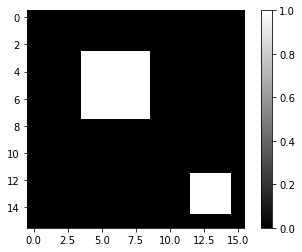

In [2]:
XX = np.array([[0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],\
              [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],\
              [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],\
              [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],\
              [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0],\
              [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(XX.shape)
plt.imshow(XX,cmap='gray')
plt.colorbar()

In [3]:
def cal_pathmtrx(row1, column1, row2, column2):
    A = np.zeros((16,16))
    introw1 = int(row1)
    introw2 = int(row2)
    intcolumn1 = int(column1)
    intcolumn2 = int(column2)
    if introw1 == introw2:
        A[introw1,:]=1
    elif intcolumn1 == intcolumn2:
        A[:,intcolumn1]=1
    elif ((introw2-introw1)/(intcolumn2-intcolumn1) != 1) & ((introw2-introw1)/(intcolumn2-intcolumn1) != -1):
        print('ERROR:K is not 1/-1')
    else:
        k = int((introw2-introw1)/(intcolumn2-intcolumn1))
        print(k)
        tol = abs(introw1-introw2)
        for i in range(tol+1): 
            row3 = int(introw1 + i*(introw2-introw1)/tol)
            column3 = int(intcolumn1 + i*(intcolumn2-intcolumn1)/tol)
            A[row3,column3] = np.sqrt(2)
        print(row3,column3)
#         print(A)
    return A

In [4]:
A1 = cal_pathmtrx(row1=0,column1=0,row2=15,column2=15)
print(A1)
A2 = cal_pathmtrx(row1=11,column1=0,row2=0,column2=11)
A3 = cal_pathmtrx(row1=0,column1=6,row2=15,column2=6)
A4 = cal_pathmtrx(row1=5,column1=0,row2=5,column2=15)
A5 = cal_pathmtrx(row1=0,column1=13,row2=15,column2=13)
A6 = cal_pathmtrx(row1=13,column1=0,row2=13,column2=15)
A7 = cal_pathmtrx(row1=0,column1=5,row2=15,column2=5)
A8 = cal_pathmtrx(row1=6,column1=0,row2=6,column2=15)
A9 = cal_pathmtrx(row1=7,column1=0,row2=7,column2=15)
A10 = cal_pathmtrx(row1=0,column1=7,row2=15,column2=7)

1
15 15
[[1.41421356 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.41421356 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         1.41421356 0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         1.41421356
  0.         0.         0.         0.         0.         0.
  0.         0.         0.   

In [5]:
newA1 = A1.reshape(1,256)
# print(newA1)
newA2 = A2.reshape(1,256)
newA3 = A3.reshape(1,256)
newA4 = A4.reshape(1,256)
newA5 = A5.reshape(1,256)
newA6 = A6.reshape(1,256)
newA7 = A7.reshape(1,256)
newA8 = A8.reshape(1,256)
newA9 = A9.reshape(1,256)
newA10 = A10.reshape(1,256)
print(newA1.shape)
A = np.concatenate((newA1,newA2,newA3,newA4,newA5,newA6,newA7,newA8,newA9,newA10))
np.set_printoptions(threshold=np.inf)
# print(A)
print(A.shape)
#reshape XX
XX = XX.reshape(256,1)
print(XX.shape)
# print(XX)

(1, 256)
(10, 256)
(256, 1)


In [6]:
Y = np.dot(A,XX)
print(Y.shape)
print(Y)

(10, 1)
[[9.89949494]
 [7.07106781]
 [5.        ]
 [5.        ]
 [3.        ]
 [3.        ]
 [5.        ]
 [5.        ]
 [5.        ]
 [5.        ]]


In [7]:
def SVD(A, n: int):
    # 这里的n就是奇异值的个数，即中间的矩阵的维度；一般n越大效果越好
    M = np.dot(A, A.T)
    eigval, eigvec = np.linalg.eig(M)
    indexes = np.argsort(-eigval)[:n]
    U = eigvec[:, indexes]
    sigma_sq = eigval[indexes]
    M = np.dot(A.T, A)
    eigval, eigvec = np.linalg.eig(M)
    indexes = np.argsort(-eigval)[:n]
    V = eigvec[:, indexes]
    sigma = np.diag(np.sqrt(sigma_sq))
    return U, sigma, V

In [8]:
U,S,V = SVD(A,256)

In [9]:
print(U.shape,S.shape,V.shape)

(10, 10) (10, 10) (256, 256)


In [10]:
V = np.real(V)
print(V)

[[ 2.31878604e-01 -5.86194304e-02 -8.07982979e-02 -1.80195332e-17
  -3.99928762e-16  3.88449002e-17 -1.84541879e-17 -3.96587463e-16
  -2.00486793e-02  4.63954478e-16  4.90634955e-02  4.90634955e-02
   2.17639807e-02  2.17639807e-02 -1.14405576e-01  4.74062652e-02
   4.74062652e-02  1.70606389e-02  1.70606389e-02 -1.58540749e-02
  -1.58540749e-02 -1.44000130e-12 -2.28150580e-15 -2.28150580e-15
  -6.90009905e-15  5.12838855e-15  4.21537447e-15  4.21537447e-15
   2.26975526e-15  2.26975526e-15  1.49098844e-14  9.93298301e-16
   9.93298301e-16 -3.91714330e-15 -3.91714330e-15 -3.41954171e-16
  -6.24711137e-16 -6.24711137e-16  2.52441271e-16  2.52441271e-16
  -1.41561185e-16  1.57430186e-16  1.08507477e-16 -1.08783929e-16
   1.14755489e-16  1.14755489e-16 -6.90944770e-17 -6.90944770e-17
   7.30384308e-17  7.30384308e-17  9.08980989e-17  9.08980989e-17
   9.06810459e-17  9.06810459e-17  1.14099187e-16  4.13967304e-17
   8.63034456e-17 -5.25431528e-17 -4.65880265e-17 -7.61261258e-18
  -7.61261

In [11]:
print(S)

[[5.77056463 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         5.04542266 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         4.21282596 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         4.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         4.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         4.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  4.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         4.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         3.93654563 0.        ]
 [0.         0.         0.         0.

In [12]:
S[0,0]=1./S[0,0]
S[1,1]=1./S[1,1]
S[2,2]=1./S[2,2]
S[3,3]=1./S[3,3]
S[4,4]=1./S[4,4]
S[5,5]=1./S[5,5]
S[6,6]=1./S[6,6]
S[7,7]=1./S[7,7]
S[8,8]=1./S[8,8]
S[9,9]=1./S[9,9]
# print(S)
apd = np.zeros((10,246))
S = np.c_[S,apd]
print(S)
print(S.shape)

[[0.17329327 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [13]:
S_ = S.T
A_ = np.dot(np.dot(V, S_), U.T)

In [14]:
print(A_)

[[-0.04049018 -0.02210312 -0.00029935 -0.00029935  0.0027291   0.0027291
  -0.00029935 -0.00029935 -0.00029935 -0.00029935]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [-0.00021167  0.01422422 -0.04251062  0.043542   -0.00714936  0.01051513
  -0.00291398 -0.02480676 -0.00805859 -0.0095676 ]
 [-0.00021167  0.01422422 -0.01814824  0.00414344  0.01571414 -0.01234837
  -0.05251652  0.00168294  0.02771375 -0.00719094]
 [-0.00021167  0.01422422 -0.0149646  -0.03447691 -0.02965217  0.03301794
   0.00647555  0.01361178  0.00903895 -0.02400034]
 [ 0.          0.          0.    

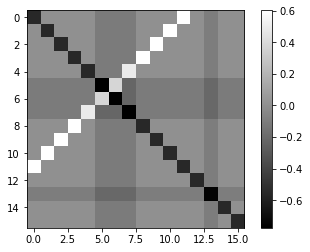

In [15]:
Xest = np.dot(A_,Y)
Xest = Xest.reshape(16,16)
plt.imshow(Xest,cmap='gray')
plt.colorbar()

In [16]:
UU, SS, VV = np.linalg.svd(A)
print(UU.shape)
print(SS.shape)
print(VV.shape)

(10, 10)
(10,)
(256, 256)


In [17]:
sigma_ = np.zeros((10,256))
sigma_[0,0] = SS[0]
sigma_[1,1] = SS[1]
sigma_[2,2] = SS[2]
sigma_[3,3] = SS[3]
sigma_[4,4] = SS[4]
sigma_[5,5] = SS[5]
sigma_[6,6] = SS[6]
sigma_[7,7] = SS[7]
sigma_[8,8] = SS[8]
sigma_[9,9] = SS[9]
sigma_ = np.linalg.pinv(sigma_)
print(sigma_.shape)

(256, 10)


In [18]:
A__ = np.dot(np.dot(VV.T, sigma_), U.T)

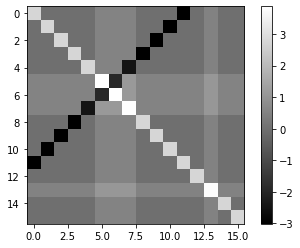

In [21]:
Xest3 = np.dot(A__,Y)
Xest3 = Xest3.reshape(16,16)
plt.imshow(Xest3,cmap="gray")
# plt.rcParams['image.cmap'] = 'greys'
plt.colorbar()